In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import acquire

**Workflow**
- notebook -> python script
    - start out in notebook
    - experiment and rapidly iterate
    - condolidate code and move into .py script
    - import the .py script into our notebook
- our .py script will generally only contain functions
- data flow: -> prepare -> exploration
- What are the benefits of the py script over notebook?
    - we dont have to use the jupyter notebook
    - easy to share
    - **allows better project organization**
    - **it can be imported as modules** makes data pipeline reproducible  + reusable
- What are some downsides of py files?
    - hard to interpret the comments
    - no kernels, the whole script has to be run at once
    - feedback loop is longer
    - minimal benefit when you are working by yourself
    - duplicated work between wragle notebooks and scripts
    - harder to debug specially when you are new
    - no markdown
    
    

## In Wrangle:
- we will start with mall customers database
- acquire: verify our acquire module is working
- summarize our data
- plot histograms, boxplots
- look at:
    - na's
    - outliers
    - astype()
    - pd.cut()
    

## Acquire

In [9]:
df = acquire.get_mall_data()

In [10]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Summarize

In [11]:
df.shape

(200, 5)

In [12]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

### Takeaways:
- encode gender
- drop customer_id
- define our target variable: use age and annual income to predict spending_score


In [14]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [15]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Takeaways**
1. Not sure how annual income column's value is generated or what units of measurement it has
2. We dont know how the spending score is calculated. Assuming that higher score means more likely to spend

### Plot Distributions

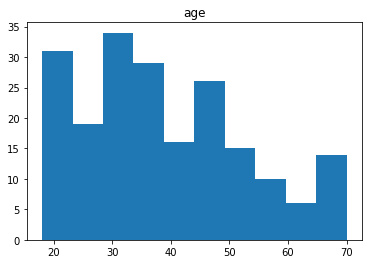

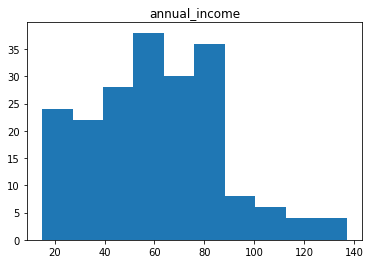

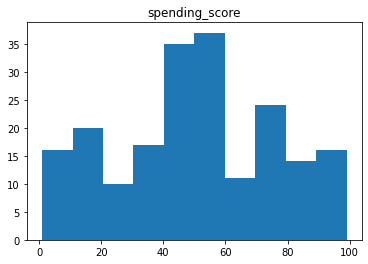

In [21]:
for col in ['age', 'annual_income', 'spending_score']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()


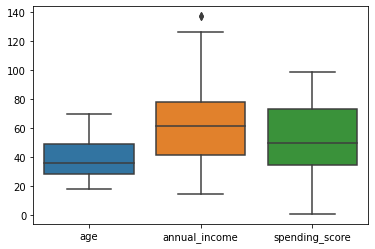

In [24]:
sns.boxplot(data = df[['age', 'annual_income', 'spending_score']])
plt.show()

In [26]:
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

### Takeaway;
- no nulls in our dataframe

**Cutting/ Binning** lets us turn a continuous variable into a categorical one by putting the numerical feature 
into bins
- pd.cut creates bins of equal width
- pd.qcut creates bins with the same number of observations

**In both cases the range of the bins is determined from the data(but can be specified)**

**This can be useful for initial exploration, interpretation, and visualization**


In [30]:
pd.cut(df.age, bins = 4).value_counts()

(17.948, 31.0]    70
(31.0, 44.0]      61
(44.0, 57.0]      43
(57.0, 70.0]      26
Name: age, dtype: int64

In [32]:
pd.qcut(df.age, 4).value_counts()

(28.75, 36.0]      54
(36.0, 49.0]       51
(17.999, 28.75]    50
(49.0, 70.0]       45
Name: age, dtype: int64

In [33]:
pd.cut(df.age, bins = [0,30,50,100]).value_counts()

(30, 50]     98
(0, 30]      62
(50, 100]    40
Name: age, dtype: int64

In [37]:
df['is_femae'] = (df.gender =='Female').astype('int')
df.head()

,customer_id,gender,age,annual_income,spending_score,is_femae
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [38]:
from sklearn.model_selection import train_test_split

In [40]:
train_validate, test = train_test_split(df, test_size =0.15, random_state = 123)
train, validate = train_test_split(train_validate, test_size = 0.15, random_state = 123)

In [42]:
print('train', train.shape)
print('validate', validate.shape)
print('test', test.shape)

train (144, 6)
validate (26, 6)
test (30, 6)
